In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [4]:
sns.set_style(style='whitegrid')

<AxesSubplot:xlabel='cgpa', ylabel='package'>

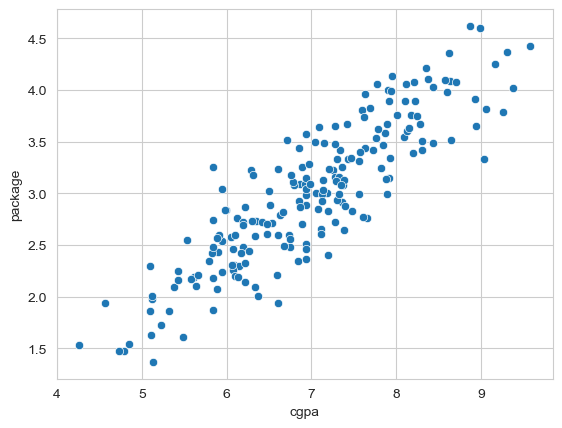

In [5]:
sns.scatterplot(x='cgpa',y='package',data=df)

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
X_test.head()

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95
128,7.93


In [16]:
y_test.head()

95     2.79
15     3.23
30     3.26
158    3.04
128    3.34
Name: package, dtype: float64

In [17]:
y_pred = lr.predict(X_test)

In [18]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.15292804])

In [20]:
print(lr.coef_)
print(lr.intercept_)

[0.57018094]
-0.9808837676635789


In [21]:
# behind the scene what is happening?
m = lr.coef_
b = lr.intercept_

# y = mx+b  where m is slope and b is intercept
# eg. take value from y test
y = m *7.36+b
print(y)

[3.21564795]


In [22]:
# Now we will focuse on performence of our model 

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2606898249919377


In [25]:
print("MSE",mean_absolute_error(y_test,y_pred))

MSE 0.2606898249919377


In [26]:
print("RMSE",np.sqrt(mean_absolute_error(y_test,y_pred)))

RMSE 0.5105779323393616


In [27]:
print("r2_score",r2_score(y_test,y_pred))

r2_score 0.7525945592908275


In [28]:
# Adjusted r2_score --> It is used when there are multiple columns are available 
# and along with that there are irrelevant features in your dataset

r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - ((1-r2)*(40-1)/(40-1-1))
print(ad_r2)
# where 40 is number of rows and last 1 is k which is no. of columns

0.746083889798481


In [29]:
# explaination of  adjusted r2_score

In [30]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.427948,3.26
1,5.12,0.820752,1.98
2,7.82,0.856761,3.25
3,7.42,0.215158,3.67
4,6.94,0.984327,3.57


Text(0, 0.5, 'Package(in lpa)')

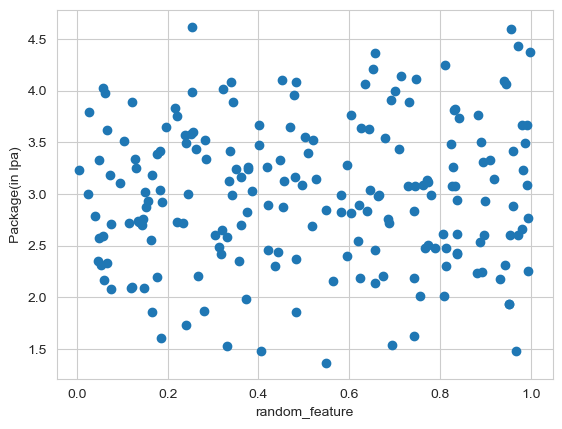

In [27]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [28]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_test)

In [33]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7749549559205969


In [34]:
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
print("adjusted r2_score",ad_r2)

adjusted r2_score 0.7627903589433319


In [35]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [36]:
new_df2.sample(5)

,cgpa,iq,package
63,9.16,5.05,4.25
165,8.21,4.08,4.08
39,7.43,2.93,3.33
83,8.44,2.69,3.49
25,7.28,2.75,3.65


Text(0, 0.5, 'Package(in lpa)')

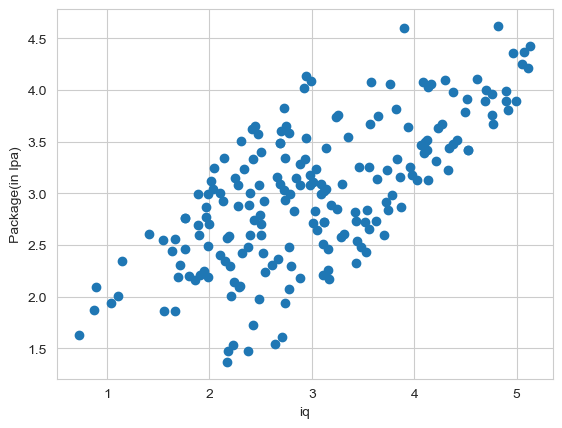

In [37]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [38]:
np.random.randint(-100,100)

-57

In [39]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8561325898600606


In [45]:
r2 = r2_score(y_test,y_pred)
ad_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
print("adjusted r2_score",ad_r2)

adjusted r2_score 0.8483559730957395
